In [ ]:
'''
  code by Tae Hwan Jung(Jeff Jung) @graykode, modify by wmathor
'''
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optimizer
import torch.utils.data as Data

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.FloatTensor

In [ ]:
sentences = ["jack like dog", "jack like cat", "jack like animal",
  "dog cat animal", "banana apple cat dog like", "dog fish milk like",
  "dog cat animal like", "jack like apple", "apple like", "jack like banana",
  "apple banana jack movie book music like", "cat dog hate", "cat dog like"]
sentence_list = " ".join(sentences).split() # ['jack', 'like', 'dog']
vocab = list(set(sentence_list))
word2idx = {w:i for i, w in enumerate(vocab)}
vocab_size = len(vocab)

In [ ]:
# model parameters
C = 2 # window size
batch_size = 8
m = 2 # word embedding dim

In [ ]:
skip_grams = []
for idx in range(C, len(sentence_list) - C):
  center = word2idx[sentence_list[idx]]
  context_idx = list(range(idx - C, idx)) + list(range(idx + 1, idx + C + 1))
  context = [word2idx[sentence_list[i]] for i in context_idx]

  for w in context:
    skip_grams.append([center, w])

In [ ]:
def make_data(skip_grams):
  input_data = []
  output_data = []
  for a, b in skip_grams:
    input_data.append(np.eye(vocab_size)[a])
    output_data.append(b)
  return input_data, output_data

In [ ]:
input_data, output_data = make_data(skip_grams)
input_data, output_data = torch.Tensor(input_data), torch.LongTensor(output_data)
dataset = Data.TensorDataset(input_data, output_data)
loader = Data.DataLoader(dataset, batch_size, True)

In [ ]:
class Word2Vec(nn.Module):
  def __init__(self):
    super(Word2Vec, self).__init__()
    self.W = nn.Parameter(torch.randn(vocab_size, m).type(dtype))
    self.V = nn.Parameter(torch.randn(m, vocab_size).type(dtype))

  def forward(self, X):
    # X : [batch_size, vocab_size]
    hidden = torch.mm(X, self.W) # [batch_size, m]
    output = torch.mm(hidden, self.V) # [batch_size, vocab_size]
    return output

In [ ]:
model = Word2Vec().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optim = optimizer.Adam(model.parameters(), lr=1e-3)

In [ ]:
for epoch in range(2000):
  for i, (batch_x, batch_y) in enumerate(loader):
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)
    pred = model(batch_x)
    loss = loss_fn(pred, batch_y)

    if (epoch + 1) % 1000 == 0:
      print(epoch + 1, i, loss.item())
    
    optim.zero_grad()
    loss.backward()
    optim.step()

1000 0 2.0227136611938477
1000 1 2.3798117637634277
1000 2 2.391190528869629
1000 3 2.285754680633545
1000 4 1.9063193798065186
1000 5 1.9651578664779663
1000 6 1.8772828578948975
1000 7 1.8816274404525757
1000 8 2.006587028503418
1000 9 2.313750982284546
1000 10 1.9250341653823853
1000 11 2.076404094696045
1000 12 1.854898452758789
1000 13 2.043060779571533
1000 14 2.341153621673584
1000 15 2.0698914527893066
1000 16 1.57113778591156
1000 17 2.1810097694396973
1000 18 2.5944101810455322
1000 19 2.2469565868377686
1000 20 1.7212722301483154
2000 0 1.816986083984375
2000 1 2.1669414043426514
2000 2 1.9809743165969849
2000 3 2.0651090145111084
2000 4 1.9306294918060303
2000 5 1.8891253471374512
2000 6 1.9777374267578125
2000 7 2.491191864013672
2000 8 2.0507924556732178
2000 9 1.9459185600280762
2000 10 1.6109706163406372
2000 11 1.9266815185546875
2000 12 2.2067410945892334
2000 13 1.9121506214141846
2000 14 2.201719045639038
2000 15 2.2587637901306152
2000 16 1.8647295236587524
2000 17

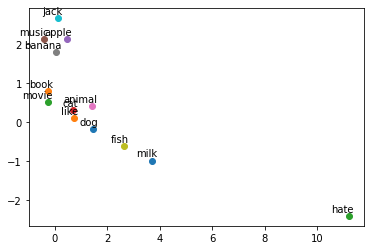

In [ ]:
import matplotlib.pyplot as plt
for i, label in enumerate(vocab):
  W, WT = model.parameters()
  x,y = float(W[i][0]), float(W[i][1])
  plt.scatter(x, y)
  plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()